1. 计算成员两两之间公共文件
2. 构建邻接矩阵存储
3. 邻接矩阵可视化
4. 加权评估协作程度

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.sparse as sp
# 解决中文显示问题
k = 741
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
matrix = np.zeros((k,k)) 


In [4]:
filename = []
str3 = "filelist"
for i in range(1,742):
    filename.append(str3 + str(i))

In [2]:
def cal_commonfile(df1,df2):
    set = {}
    common_set = {}
    for index, row in df1.iterrows():
        set[row["file"]]= row["times"]
    for index, row in df2.iterrows():
        if(set.get(row["file"]) != None):
            set[row["file"]] += row["times"]
            common_set[row["file"]] = set[row["file"]]
    return common_set

def cal_commonfile2(df1,df2):
    set = {}
    common_set = {}
    for index, row in df1.iterrows():
        set[row["file"]]= 1
    for index, row in df2.iterrows():
        if(set.get(row["file"]) != None):
            set[row["file"]] += 1
            common_set[row["file"]] = set[row["file"]]
    return common_set

def add2matrix(i,j,set):
    weight = 0
    for key, values in set.items():
        weight += values
    matrix[i][j] = weight
    matrix[j][i] = weight

In [3]:
def get_matrix_triad(coo_matrix, data=True):
    '''
    获取矩阵的元组表示  (row,col)
    data 为 True 时 (row,col,data)
    :dependent  scipy
    :param coo_matrix: 三元组表示的稀疏矩阵  类型可以为 numpy.ndarray
    :param data: 是否需要 data值
    :return: list
    '''
    # 检查类型
    if not sp.isspmatrix_coo(coo_matrix):
        # 转化为三元组表示的稀疏矩阵
        coo_matrix = sp.coo_matrix(coo_matrix)
    # nx3的矩阵  列分别为 矩阵行，矩阵列及对应的矩阵值
    temp = np.vstack((coo_matrix.row, coo_matrix.col,
                     coo_matrix.data)).transpose()
    return temp.tolist()


def matrix_visualize():
    edges = get_matrix_triad(matrix)
    G = nx.Graph()
    H = nx.path_graph(matrix.shape[0])
    G.add_nodes_from(H)
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G, iterations=20)
    edgewidth = []
    for (u, v, d) in G.edges(data=True):
        edgewidth.append(round(list(G.get_edge_data(u, v).values())[0]/25, 2))
    colors = np.arange(matrix.shape[0])
    nx.draw_networkx_nodes(G,pos,node_color=colors, node_size=60)
    nx.draw_networkx_edges(G,pos,width=edgewidth)
    #nx.draw_networkx_labels(G,font_family='SimHei',alpha=0.8)
    #nx.draw(G, pos=nx.spring_layout(G), node_color=colors)
    plt.title('成员协作关系网络图')
    plt.show()


In [9]:
path = "./datacsv/"
for i in range(len(filename)):
    df1  = pd.read_csv(path+filename[i]+".csv")
    for j in range(i+1,len(filename)):
        df2  = pd.read_csv(path+filename[j]+".csv")
        set = cal_commonfile(df1,df2)
        #set = cal_commonfile2(df1,df2)
        add2matrix(i,j,set)

In [10]:
matrix

array([[ 0., 53.,  0., ...,  0.,  0.,  0.],
       [53.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  5.,  0.],
       [ 0.,  0.,  0., ...,  5.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [20]:
np.savetxt("paddlepaddle.txt", matrix, fmt="%d", delimiter=",") 

In [16]:
np.loadtxt("paddlepaddle.txt",delimiter=",")

array([[ 0., 53.,  0., ...,  0.,  0.,  0.],
       [53.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  5.,  0.],
       [ 0.,  0.,  0., ...,  5.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

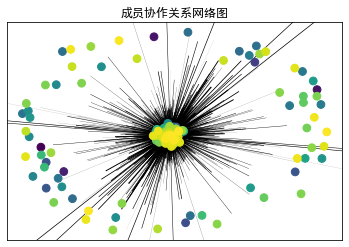

In [19]:
matrix_visualize()

### 协作关系评估
1. 协作关系密集度，协作关系强度
$$Indensity = \frac{\sum_{i=1}^{n}w_i}{(v^2-v)/2}$$
2. 协作均衡度，任务均衡度
$$Balance  = \frac{2}{v^2-v}\sum_{i=1}^{n}\left(w_i-Indensity \right)^2$$

In [6]:
matrix = np.zeros((5,5))
path = './toydata/'
filename1 = ['19302010065','1563407190','820651854','19302010062','19302010080']
for i in range(len(filename1)):
    df1  = pd.read_csv(path+filename1[i]+".csv")
    for j in range(i+1,len(filename1)):
        df2  = pd.read_csv(path+filename1[j]+".csv")
        set = cal_commonfile(df1,df2)
        #set = cal_commonfile2(df1,df2)
        add2matrix(i,j,set)

In [15]:
import math
edges = 5*4/2
Indensity = 0
Balance = 0
for x in np.nditer(matrix):
    Indensity += x
Indensity/=edges
Indensity/=2
for x in np.nditer(matrix):
    if(x > 0):
        Balance += (x-Indensity)
Balance/=edges
Balance/=2
print(Indensity)
print(Balance)

20.8
1.5987211554602255e-15


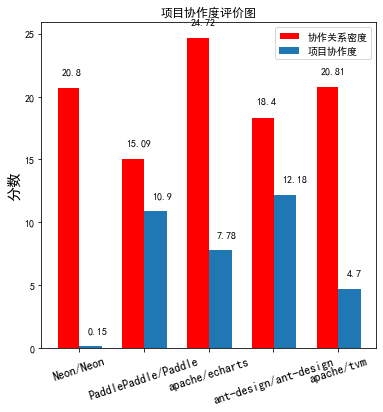

In [21]:
d_score = [20.8,15.09,24.72,18.4,20.81]
b_score = [0.15,10.9,7.78,12.18,4.7]
subjects = ['Neon/Neon','PaddlePaddle/Paddle','apache/echarts','ant-design/ant-design','apache/tvm']
n = 5
# 绘图
plt.figure(figsize = (6,6))
plt.bar(x = np.arange(n),height = d_score,width = 0.35,label = '协作关系密度',edgecolor = 'white',color = 'r',tick_label = subjects)
plt.bar(x = np.arange(n)+0.35,height = b_score,width = 0.35,label = '项目协作度')
 
# 补充标题及标签
plt.title('项目协作度评价图') # 图的标题
plt.ylabel('分数',fontsize = 15)  # 纵轴标签
plt.xticks(np.arange(n)+0.17,subjects,rotation = 18,fontsize = 12)  # 柱状图横轴坐标各类别标签
plt.legend()  # 显示两组柱状图的标签
 
# 注释各柱状图的数值，在这里即分数
for i in range(len(subjects)):
    plt.text(x = i-0.1, y = d_score[i]+1,s = d_score[i] ) # s表示注释内容
for i in range(len(subjects)):
    plt.text(x = i+0.3, y = b_score[i]+1,s = b_score[i] )
# 显示图像
plt.show()